#### From Lecture

#### Logistic Regression
* linear not good when range is restricted
    * e.g. positive values, binary data, count data, percent/proportion (0-1)
    * linear goes beyond those values and therefore in correct mathematically 
* logistic is for classifcation - separating different groups
* relies on principles of linear regression
* take features - calculate a percentage - and classifies 
* can make a hard prediction (binary 0,1)
* soft prediction with probabilities - likelihood of classification
* 'linear classifer' one coefficient per feature + intercept
* combined with dot product
* decision boundry is a hyperplane - dividing the feature space in half
* coefficients controls the tile/orientation of the hyperplane


#### Model Evaluation for classifers
* confusion matrix to find - true negative/positive and false neg/positive
* accuracy might be biased if low samples for one of the classes - true negatives or true positive
* but recall and precision might have different reports 

#### multinomial regression 
* multiple groups trying to predict
* one vs one OR one vs rest
* compares one group to the rest with a linear regression


#### From Compass

Odds
* probability is ratio of something happening to everything that could happen P(1) / P(1)+P(2)
* Odds ratio of something happening vs ratio of something not happening P(win) vs P(lose)
* odds 1:4 of winning, 1 win divided by 4 losses (0.25 chance of winning)
* odds 5:3 of winning, 5 win divided by 3 (1.7) 
* Odds != probability 
* probability of winning 1/5, probability losing 4/5
* odds can be taken from probability or counts
* for e.g. probability of winning (1/5) / 1-probability of winning (4/5) =  1/4 odds of winning 
* odds = p/(1-p)

Log Odds
* better chances of winning - odds increases (will be 1 to infinity)
* odds losing (1/6), while odds winning can be for e.g. 6/1 - difference in odds is large and asymmetrical
* gives an asymmetry in odds 
* log makes everything symmetrical around 0
* for e.g. log(1/6) = -1.79 and log(6) = 1.79 - distance from origin becomes the same from 0
* log of probability or counts can be used to get odds
* 'logit function' log(p/1-p) basis of logistic regression
* useful for solving statistical problems (yes or no problems)
* odds is a ratio but NOT an odds ratio

Logistic Regression
* biggest advantage is interpretability - can go back and see your weights, etc.
* types:
    * Binary (two possible outcomes) - common use
    * Multinomial (three or more categories w/o ordering)
    * Ordinal (3+ categories with ordering-movie ratings for e.g.)
* can be simple (one feature)
* multiple (many features) 
* solves some of the issues in linear
    * affected by outliers, and goes beyond the range of data  (0,1)
* logistic predicts odds instead of probability 
* log of odds - to tackle negative numbers 
* ends up with a sigmoid function - squeezes the output to be inbetween 0 and 1
* p = 1/(1+e^-1(b0+b1x1...))
* start with linear transformed to logistic regression via  sigmoid function 
* loss function in logistic is "cross-entropy loss function" because probability only varies between 0 and 1
* can't use MSE as in linear 

In [1]:
## sample logistic regression
dataset_url = "https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv"

In [2]:
import pandas as pd
fish = pd.read_csv(dataset_url, error_bad_lines=False)
fish.head()

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_25837/3713214588.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fish = pd.read_csv(dataset_url, error_bad_lines=False)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
X = fish.iloc[:, 1:]
y = fish.loc[:, 'Species']

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [6]:
from sklearn.preprocessing import LabelEncoder #transforms the categories into either 0,1,2,3,4 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.25%


Text(0.5, 1.0, 'Confusion Matrix')

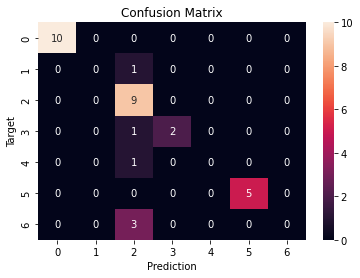

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

Another Example of Logistic
* .predict() for predicting class label - cut off at 0.5
* .predict_proba() for predicting probability can set custom cut-off to decide between labels (0.2 for e.g.)

In [15]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [26]:
df = pd.read_csv('heartattk_data.csv', na_values='?')

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [28]:
df = df.rename(columns={'num       ': 'target'})
df['target'].value_counts(dropna=False) # check for imbalance in data - not bad split

0    188
1    106
Name: target, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [30]:
# remove columns with missing values
df = df.drop(['slope', 'ca', 'thal'], axis=1)

df = df.dropna().copy()

In [31]:
# for logistic regression - transform categorical variables into dummy variables (one hot encoded - such as sex, fbs, exang)
df['cp'].value_counts(dropna=False)
df['restecg'].value_counts(dropna=False)

0.0    208
1.0     47
2.0      6
Name: restecg, dtype: int64

In [32]:
# converts data to dummies, drop_first, first level of the dummy variable is removed 
df = pd.get_dummies(df, columns=['cp', 'restecg'], drop_first=True)

In [33]:
# when cp=1, the rest is zero - not needed to distinguish between them
# numeric columns and categorical columns as numeric cols 
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'target'})

In [34]:
cat_cols.sort()
print(numeric_cols)
print(cat_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['cp_2', 'cp_3', 'cp_4', 'exang', 'fbs', 'restecg_1.0', 'restecg_2.0', 'sex']


In [35]:
# splitting data to train/test
random_seed = 888
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['target'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(208, 14)
(53, 14)

0    0.625
1    0.375
Name: target, dtype: float64

0    0.622642
1    0.377358
Name: target, dtype: float64


In [36]:
# scale numerical variables to mean/sd 
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled)) #combines the two into one array
    y = df['target']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

In [42]:
# fit the logistic regression on training data set
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.
clf.fit(X, y)

LogisticRegression(penalty='none')

In [43]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


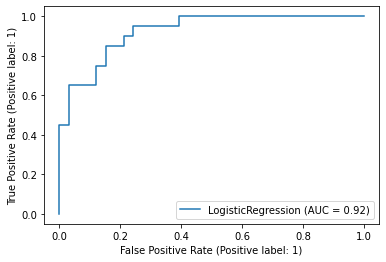

In [44]:
plot_roc_curve(clf, X_test, y_test) #ROC curve

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


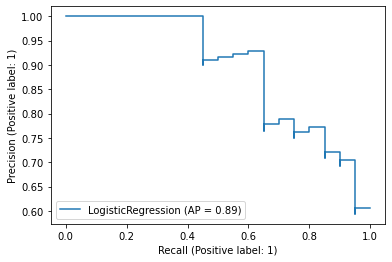

In [45]:
plot_precision_recall_curve(clf, X_test, y_test) #precision recall

In [46]:
# predict_proba for other metrics - returns probability for target=0 and target=1, use target=1 (index 1 column 2 in the array)
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [47]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.35613
AUC = 0.92424
Average Precision = 0.89045

Using 0.5 as threshold:
Accuracy = 0.83019
Precision = 0.76190
Recall = 0.80000
F1 score = 0.78049

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.76      0.80      0.78        20

    accuracy                           0.83        53
   macro avg       0.82      0.82      0.82        53
weighted avg       0.83      0.83      0.83        53



Confusion Matrix


/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


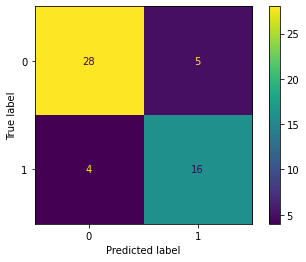

In [48]:
# note if accuracy for training is much higher than test - only doing test here
# can also plot confusion matrix
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [49]:
# allows to get the coefficients from regression and see what had the most influence
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-0.178340
1,cp_2,-2.895253
2,cp_3,-1.808676
3,cp_4,-0.830942
4,exang,0.514580
5,fbs,1.514143
6,restecg_1.0,-0.638990
7,restecg_2.0,-0.429625
8,sex,1.290292
9,age,0.059633


In [50]:
# because numerical variables have been scaled - must think of them in standard deviation
# printing standard deviation of numeric vars
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,age,7.909365
1,trestbps,18.039942
2,chol,63.470764
3,thalach,24.071915
4,oldpeak,0.891801


In [ ]:
# interpretation: for cholesterol, exp(0.345501) = 1.41 - 41% increase in odds of having heart disease for every standard dev increase (63.4) in cholesterol

#### Softmax Regression/Multiclass/Multinomial
* [forMath](https://sebastianraschka.com/faq/docs/softmax_regression.html)
* generalizes logistic regression to multiclass problems
* predicts possibilities of different possible outcomes given set of IVs/features (real-values, binary, or categorical)
* going back to sigmoid function - calculate error - adjust weights and constants
* instead of sigmoid - uses 'softmax function theta'
* computes probability for each class label, sums up to 1
* grabs the largest probability - and returns the class label 
* for optimizing - need to lower the 'cross-entropy'in training samples - loss function of softmax regression
* calculates sum of log(computed probabilities from softmax) * target true labels - tries to minimize it
* iterates until finds a desired cross threshold (? revisit)

#### GLM - Generalized Linear Model
* flexible generalization of ordinary linear regression
* fit linear regression on variables that have errors that are not normally distributed
* allows linear model to relate to a response variable via 'link' function
* magnitude of variance of each measurement is a function of its predicted value
* how logistic regression works 

From reading
* Poisson regression model - example of GLM
* GLM has three components:
    * linear predictor (mx + b) - linear combination of b
    * link function - links the linear predictor to a probability distribution, can be a log linkfunction (ln y)
    * probability distribution - generates the observed variable y
* poisson distribution models count data
    * only has one parameter representing mean and standard deviation
    * relationship is linear, greater mean the greater the standard dev
* predictor curve is exponential 
* code for poisson regression in statsmodels

```python
# Poisson regression code
import statsmodels.api as sm
exog, endog = sm.add_constant(x), y # exog and endog are x,y
mod = sm.GLM(endog, exog,
             family=sm.families.Poisson(link=sm.families.links.log))
res = mod.fit()
```
<br>

Other Regressions
* another example of GLM - all regression is based on GLM - and is about changing distribution and link function used
* uses identity link function (linear predictor and probability distribution are identical)
* probability distribution is normal distribution 
* using logit function as link function - and a binomial/bernoulli distribution as prob distribution - creates a logistic regression 
* binomial/bernoulli - when there's two options, repeating - leads to a normal distribution 
* Normal distribution: identity function
* Poisson distribution: log function
* Binomial distribution: logit function

In [51]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

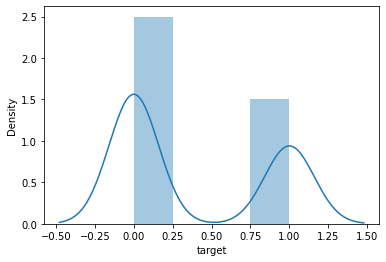

In [53]:
sns.distplot(df.target)

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


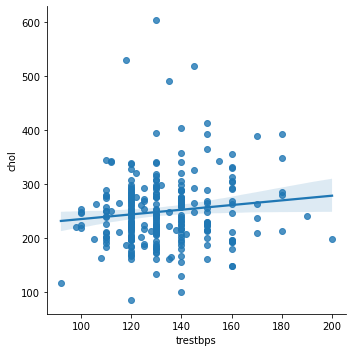

In [54]:
sns.lmplot('trestbps', 'chol', data=df)

In [ ]:
# for count values use a poisson regression - using Statsmodel

import statsmodels.api as sm

# X = bikes['Average Temp']
# y = bikes['Total']

# # add intercept to input variable
# X = sm.add_constant(X)

# # fit poisson regression model 
# model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# # add poisson fitted values to dataframe
# bikes['reg_fit'] = model.fittedvalues

# plot and add a regression line
# sns.regplot(bikes['Average Temp'], bikes['Total'], fit_reg=False)
# plt.plot(bikes['Average Temp'], bikes['reg_fit']);
